# PROJECT 31: HEALTH OUTCOMES DATA EXPLORATORY DATA ANALYSIS

## Authors: Hana Ateeq, Judy Cha, Amelia Nash, Viza Zhou

## Last Edited: 07/19/2022

## INSTALLATION PROCEDURES

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from google.colab import files
import io
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
input = files.upload()

Saving NationalAndStatePregnancy_Public - final - 0719.csv to NationalAndStatePregnancy_Public - final - 0719.csv


Read in National and State Pregnancy Data csv as data

In [ ]:
# Import Data
# data = pd.read_csv('NationalAndStatePregnancy_Public - final - 0719.csv')
data =pd.read_csv('NationalAndStatePregnancy_Public - final - 0719.csv', encoding = "ISO-8859-1")
extracted_col_1 = data.iloc[:,1]
extracted_col_2 = data.iloc[:,2]
extracted_col_3 = data.iloc[:,102]
extracted_col_4 = data.iloc[:,103]
# data

Inspect columns with Null Values

In [ ]:
data_is_null = pd.DataFrame(index=['0'], columns = data.columns)

for i in range(data.shape[1]):
    data_is_null.iat[0,i] = data.iloc[:,i].isnull().sum()

data_is_null = data_is_null.loc[:, (data_is_null != 0).any(axis=0)]
data_is_null

,Legal or Illegal,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,pregnancyrate3539,...,miscarriages1517,miscarriages1819,miscarriages1519,miscarriageslt20,miscarriages2024,miscarriages2529,miscarriages3034,miscarriages3539,miscarriages40plus,notes
0,45,43,18,18,3,3,3,3,3,3,...,18,18,3,3,3,3,3,3,3,733


In [ ]:
data_is_null.columns

Index(['Legal or Illegal', 'pregnancyratelt15', 'pregnancyrate1517',
       'pregnancyrate1819', 'pregnancyrate1519', 'pregnancyratelt20',
       'pregnancyrate2024', 'pregnancyrate2529', 'pregnancyrate3034',
       'pregnancyrate3539', 'pregnancyrate40plus', 'abortionratelt15',
       'abortionrate1517', 'abortionrate1819', 'abortionrate1519',
       'abortionratelt20', 'abortionrate2024', 'abortionrate2529',
       'abortionrate3034', 'abortionrate3539', 'abortionrate40plus',
       'birthratelt15', 'abortionratiolt15', 'abortionratio1517',
       'abortionratio1819', 'abortionratio1519', 'abortionratiolt20',
       'abortionratio2024', 'abortionratio2529', 'abortionratio3034',
       'abortionratio3539', 'abortionratio40plus', 'pregnancieslt15',
       'pregnancies1517', 'pregnancies1819', 'pregnancies1519',
       'pregnancieslt20', 'pregnancies2024', 'pregnancies2529',
       'pregnancies3034', 'pregnancies3539', 'pregnancies40plus',
       'abortionslt15', 'abortions1517', 'abort

Populate Missing Values Using Interpolation

In [ ]:
total_state_number = len(Counter(data['state']).keys())
num_data = data
num_data.drop(num_data.columns[1], axis=1, inplace=True)
num_data.drop(num_data.columns[1], axis=1, inplace=True)
num_data.drop(num_data.columns[100], axis=1, inplace=True)
num_data.drop(num_data.columns[100], axis=1, inplace=True)

# Original numerical data
# num_data

In [ ]:
num_data = num_data.groupby('state').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

# Data group by state then interpolate
# num_data

In [ ]:
# Fill the rest empty cells by zero
num_data.fillna(0, inplace=True)

In [ ]:
num_data

,state,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,pregnancyrate3539,...,population40plus,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,AL,21.3,78.3,155.7,110.5,114.3,186.5,152.5,87.2,31.9,...,132391,945017,20100,60745,100.5,64.3,21.3,330.9,14160,95000
1,AL,23.6,76.3,173.4,116.4,120.9,184.2,155.0,87.2,32.0,...,152130,963462,17720,62260,97.8,64.6,18.4,284.6,14220,94200
2,AL,18.5,66.2,156.2,102.4,106.0,176.6,143.2,90.5,34.6,...,167319,979413,14940,60488,90.9,61.8,15.3,247.0,13590,89020
3,AL,11.9,53.7,140.8,89.8,92.1,186.8,158.7,96.1,37.6,...,177209,970239,13060,63299,93.1,65.2,13.5,206.3,13970,90320
4,AL,8.7,38.6,118.7,70.8,72.5,165.8,154.8,100.5,40.7,...,173653,950989,10840,60453,88.8,63.6,11.4,179.3,13170,84470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WY,4.0,18.7,75.6,41.9,42.2,140.0,167.5,113.5,49.1,...,16261,110156,820,7644,91.5,69.4,7.5,107.5,1610,10080
908,WY,4.0,17.6,82.3,43.2,43.6,138.7,169.2,116.3,51.5,...,16099,109953,850,7696,92.5,70.0,7.7,110.5,1620,10170
909,WY,4.0,14.4,79.7,40.1,40.6,140.3,164.1,121.3,54.6,...,15984,110164,810,7765,92.7,70.5,7.3,104.1,1630,10210
910,WY,4.0,13.7,72.1,36.7,37.3,125.6,159.2,123.6,53.0,...,15839,109474,770,7386,88.7,67.5,7.0,103.7,1550,9710


#### Examine output of interpolation: NaN checker

In [ ]:
# Check if the interpolated data still has any missing values
num_data_is_null = pd.DataFrame(index=['0'], columns = num_data.columns)

for i in range(num_data.shape[1]):
    num_data_is_null.iat[0,i] = num_data.iloc[:,i].isnull().sum()

num_data_is_null = num_data_is_null.loc[:, (num_data_is_null != 0).any(axis=0)]
num_data_is_null

""
0


In [ ]:
num_data.insert(1, "year", extracted_col_1)

In [ ]:
num_data.insert(2, "Legal or Illegal", extracted_col_2)

In [ ]:
num_data.insert(102, "notes", extracted_col_3)

In [ ]:
num_data.insert(103, "versiondate", extracted_col_4)

In [ ]:
num_data

,state,year,Legal or Illegal,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,...,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal,notes,versiondate
0,AL,1988,Illegal,21.3,78.3,155.7,110.5,114.3,186.5,152.5,...,20100,60745,100.5,64.3,21.3,330.9,14160,95000,Abortion estimate based on the number of abort...,1 Mar 2021
1,AL,1992,Illegal,23.6,76.3,173.4,116.4,120.9,184.2,155.0,...,17720,62260,97.8,64.6,18.4,284.6,14220,94200,NaN,1 Mar 2021
2,AL,1996,Illegal,18.5,66.2,156.2,102.4,106.0,176.6,143.2,...,14940,60488,90.9,61.8,15.3,247.0,13590,89020,NaN,1 Mar 2021
3,AL,2000,Illegal,11.9,53.7,140.8,89.8,92.1,186.8,158.7,...,13060,63299,93.1,65.2,13.5,206.3,13970,90320,NaN,1 Mar 2021
4,AL,2005,Illegal,8.7,38.6,118.7,70.8,72.5,165.8,154.8,...,10840,60453,88.8,63.6,11.4,179.3,13170,84470,NaN,1 Mar 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WY,2013,legal,4.0,18.7,75.6,41.9,42.2,140.0,167.5,...,820,7644,91.5,69.4,7.5,107.5,1610,10080,Abortion estimate based on the number of abort...,1 Mar 2021
908,WY,2014,legal,4.0,17.6,82.3,43.2,43.6,138.7,169.2,...,850,7696,92.5,70.0,7.7,110.5,1620,10170,Abortion estimate based on the number of abort...,1 Mar 2021
909,WY,2015,legal,4.0,14.4,79.7,40.1,40.6,140.3,164.1,...,810,7765,92.7,70.5,7.3,104.1,1630,10210,Abortion estimate based on the number of abort...,1 Mar 2021
910,WY,2016,legal,4.0,13.7,72.1,36.7,37.3,125.6,159.2,...,770,7386,88.7,67.5,7.0,103.7,1550,9710,Abortion estimate based on the number of abort...,1 Mar 2021


In [ ]:
num_data.to_csv('NationalAndStatePregnancy_Public - 0719 - MissingValuesFilled.csv', index=False, na_rep='n/a')

Covariance Matrix

In [ ]:
#load csv
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn' ignoring warnings in regards to adding columns to a copy of the original dataframe since we are not modifying the base dataframe when calculating covariance

In [ ]:
from google.colab import files

input = files.upload()

Saving NationalAndStatePregnancyMissingValuesFilled.csv to NationalAndStatePregnancyMissingValuesFilled (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(input['NationalAndStatePregnancyMissingValuesFilled.csv']))
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 104 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    state                912 non-null    object 
 1    year                 912 non-null    int64  
 2    Legal or Illegal     867 non-null    object 
 3    pregnancyratelt15    912 non-null    float64
 4    pregnancyrate1517    912 non-null    float64
 5    pregnancyrate1819    912 non-null    float64
 6    pregnancyrate1519    912 non-null    float64
 7    pregnancyratelt20    912 non-null    float64
 8    pregnancyrate2024    912 non-null    float64
 9    pregnancyrate2529    912 non-null    float64
 10   pregnancyrate3034    912 non-null    float64
 11   pregnancyrate3539    912 non-null    float64
 12   pregnancyrate40plus  912 non-null    float64
 13   abortionratelt15     912 non-null    float64
 14   abortionrate1517     912 non-null    float64
 15   abortionrate1819     

In [ ]:
#filling in NAN with 'NA'
df['Legal or Illegal'] = df['Legal or Illegal'].fillna('NA')

In [ ]:
#dropping irrelevant columns
df1 = df.drop(['notes','versiondate'],axis=1)

In [ ]:
#Bulding mini dataframe based on pregnancy Totals and RATE related data
df_preg = df1.filter(regex='pregnancies')
df_preg['state'] = df1['state']
df_preg['year'] = df1['year']

#Building mini data frame based on pregnancy count data
df_pregrate = df1.filter(regex='pregnancyr')
df_pregrate['state'] = df1['state']
df_pregrate['year'] = df1['year']

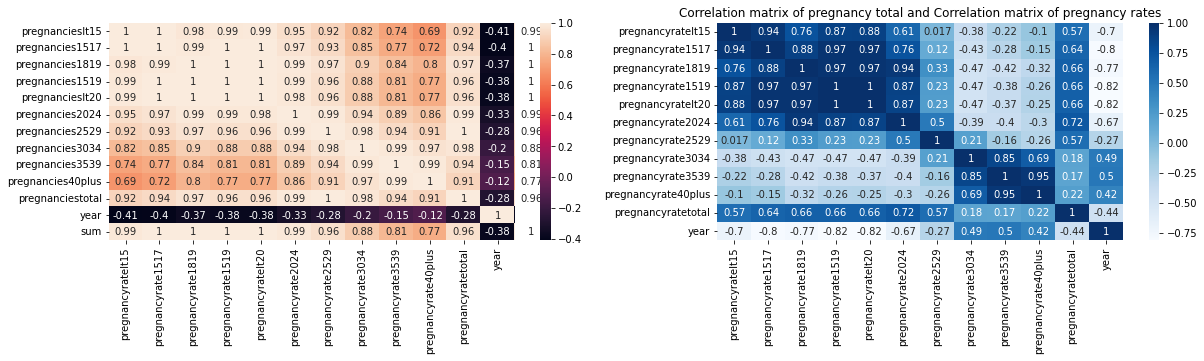

In [ ]:
#building a correlation matrix and plotting a heat map of it.
preg_correlation_mat = df_preg.corr()
pregrate_correlation_mat = df_pregrate.corr()

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 4), sharex=True)
#sns.despine(left=True)
sns.heatmap(preg_correlation_mat, annot = True, ax=ax1)
sns.heatmap(pregrate_correlation_mat, annot = True, cmap='Blues',ax=ax2)

plt.title('Correlation matrix of pregnancy total and Correlation matrix of pregnancy rates', y=-0.75)
plt.show()

The beige colored map is based on pregnancy counts correlation data while the blue heat map is based on pregnancy rates correlation data.

In [ ]:
df_preg['sum'] = df_preg['pregnancies1517'] + df_preg['pregnancies1819']
df_preg.head()

,pregnancieslt15,pregnancies1517,pregnancies1819,pregnancies1519,pregnancieslt20,pregnancies2024,pregnancies2529,pregnancies3034,pregnancies3539,pregnancies40plus,pregnanciestotal,state,year,sum
0,610.0,7440.0,10560.0,18000.0,18610.0,30410.0,25890.0,14470.0,4820.0,800.0,95000,AL,1988,18000.0
1,700.0,6820.0,10890.0,17710.0,18410.0,30390.0,24210.0,14820.0,5380.0,990.0,94200,AL,1992,17710.0
2,580.0,6370.0,10120.0,16490.0,17070.0,27620.0,22430.0,14650.0,6100.0,1150.0,89020,AL,1996,16490.0
3,370.0,5050.0,9360.0,14410.0,14780.0,29180.0,23900.0,14690.0,6500.0,1280.0,90320,AL,2000,14410.0
4,280.0,3740.0,7710.0,11440.0,11730.0,27130.0,22830.0,15040.0,6290.0,1440.0,84470,AL,2005,11450.0


Looking at the totals and it appears that pregnancylt20 is the sum total of pregnancies up to 20 years of age. I believe we can drop all the other rows related to the less than 20 age group: pregnancyratelt15, pregnancyrate1517,   pregnancyrate1819, pregnancyrate1519, pregnancieslt15,pregnancies1517,pregnancies1819,pregnancies1519

In [ ]:
#building a mini dataframe containing abortion data
df_abortion = df1.filter(regex='abortions')
df_abortion['state'] = df1['state']
df_abortion['year'] = df1['year']

df_abortionratio = df1.filter(regex='abortionratio')
df_abortionratio['state'] = df1['state']
df_abortionratio['year'] = df1['year']
df_abortion.head()

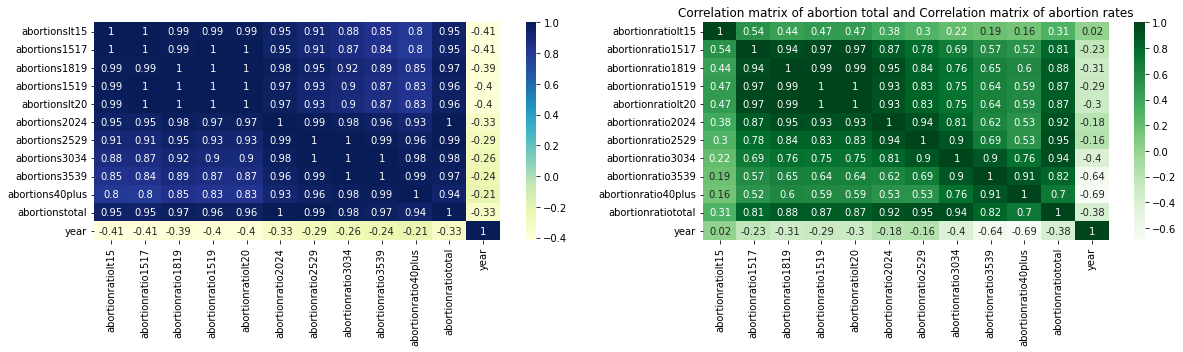

In [ ]:
#building a correlation matrix and plotting a heat map of it.
abortion_correlation_mat = df_abortion.corr()
abortionratio_correlation_mat = df_abortionratio.corr()

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 4), sharex=True)
sns.heatmap(abortion_correlation_mat, annot = True, cmap='YlGnBu',ax=ax1)
sns.heatmap(abortionratio_correlation_mat, annot = True, cmap='Greens',ax=ax2)

plt.title('Correlation matrix of abortion total and Correlation matrix of abortion rates', y=-0.75)
plt.show()

In [ ]:
df_abortion.head()

,abortionslt15,abortions1517,abortions1819,abortions1519,abortionslt20,abortions2024,abortions2529,abortions3034,abortions3539,abortions40plus,abortionstotal,state,year
0,250.0,2280.0,2830.0,5110.0,5360.0,6600.0,4320.0,2410.0,1120.0,290.0,20100,AL,1988
1,250.0,1710.0,2440.0,4150.0,4400.0,6290.0,3520.0,2040.0,1150.0,320.0,17720,AL,1992
2,190.0,1200.0,2000.0,3200.0,3390.0,5420.0,3090.0,1760.0,980.0,310.0,14940,AL,1996
3,120.0,870.0,1610.0,2490.0,2610.0,4620.0,3060.0,1560.0,930.0,290.0,13060,AL,2000
4,90.0,680.0,1240.0,1930.0,2020.0,3790.0,2490.0,1530.0,760.0,250.0,10840,AL,2005


The subset of abortion data appears to be redundant for all ages 20 as well. So we should be able to drop abortionratiolt15, abortionratio1517,abortionratio1819, abortionratio1519, abortionslt15, abortions1517,abortions1819, abortions1519

In [ ]:
#building a mini dataframe containing miscarriage data
df_miscarriage = df1.filter(regex='miscarriage')
df_miscarriage['state'] = df1['state']
df_miscarriage['year'] = df1['year']

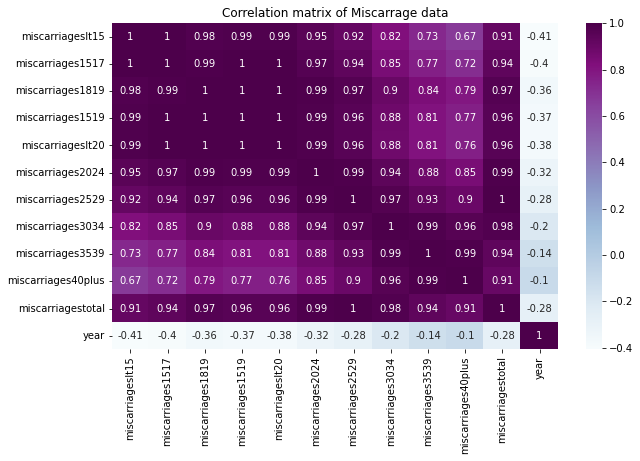

In [ ]:
#calculate correlation matrix for miscarriages and plot it
miscarriage_correlation_mat = df_miscarriage.corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(miscarriage_correlation_mat, annot = True, cmap='BuPu',ax=ax)

plt.title("Correlation matrix of Miscarrage data")

plt.show()

Like the previous two subsets, the miscarriage data appears to be redundant for colums where the patients age is less than 20.  We should be able to drop miscarriageslt15, miscarriages1517,miscarriages1819 and miscarriages1519

In [ ]:
df_rate = pd.concat([df_abortionratio,df_pregrate],axis=1)
df_rate2 = df_rate.drop(['abortionratiolt15','abortionratio1517','abortionratio1819','abortionratio1519','pregnancyratelt15','pregnancyrate1517','pregnancyrate1819','pregnancyrate1519','state','year'],axis=1)
df_rate2.head()

,abortionratiolt20,abortionratio2024,abortionratio2529,abortionratio3034,abortionratio3539,abortionratio40plus,abortionratiototal,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,pregnancyrate3539,pregnancyrate40plus,pregnancyratetotal
0,505.6,342.2,245.0,245.1,376.2,709.4,330.9,114.3,186.5,152.5,87.2,31.9,6.1,100.5
1,389.2,321.3,207.4,195.2,336.7,596.2,284.6,120.9,184.2,155.0,87.2,32.0,6.5,97.8
2,304.6,300.1,194.7,166.2,234.4,451.5,247.0,106.0,176.6,143.2,90.5,34.6,6.9,90.9
3,262.5,229.9,178.8,144.7,202.7,358.5,206.3,92.1,186.8,158.7,96.1,37.6,7.2,93.1
4,255.1,198.0,148.8,137.0,167.7,259.0,179.3,72.5,165.8,154.8,100.5,40.7,8.3,88.8


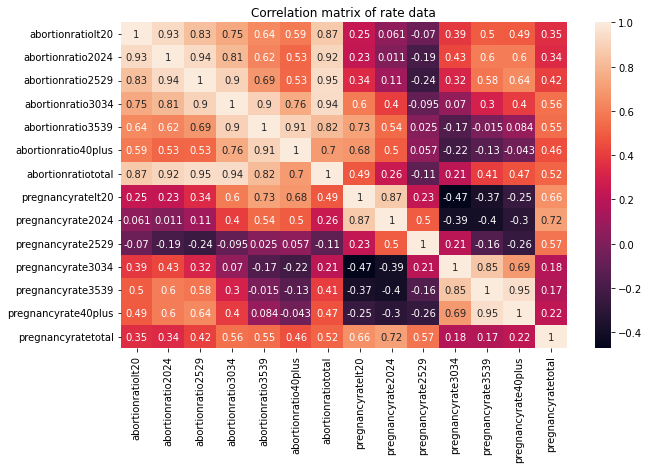

In [ ]:
#calculate correlation matrix for miscarriages and plot it
rate_correlation_mat = df_rate2.corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(rate_correlation_mat, annot = True, ax=ax)

plt.title("Correlation matrix of rate data")

plt.show()

Question: We found high correlations between pregnancy rate in the 35 to 39 year age group and the 40+ age group. This may be a significant finding - should we drop the variable?